# loading dataset

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

In [ ]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

# saving/loading cifar dataset 

In [ ]:
# import pickle
# dataset = (x_train, y_train), (x_test, y_test)
# dataset_file = open('cifar_dataset.pkl', 'wb')
# pickle.dump(dataset, dataset_file)
# dataset_file.close()

# import pickle
# dataset_file = open('cifar_dataset.pkl', 'rb')
# dataset = pickle.load(dataset_file)
# dataset_file.close()
# (x_train, y_train), (x_test, y_test) = dataset

print('Shape of training set:', x_train.shape, '\nShape of test set: ', x_test.shape)
print('Shape of labels training set:', y_train.shape, '\nShape of labes test set: ', y_test.shape)

# methods for creating dataset

In [ ]:
# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9

# filters for the first 5 classes
def filter_dataset(x_data,y_data):
    filter_arr = []
    for i in y_data:
        if i in (0,1,2,3,4):
            filter_arr.append(True)
        else:
            filter_arr.append(False)
    y_data = y_data[filter_arr]
    x_data = x_data[filter_arr]
    
    return (x_data,y_data)

def create_dataset(x_train, y_train, x_test, y_test):
    x_train, y_train = filter_dataset(x_train, y_train)
    x_test, y_test = filter_dataset(x_test, y_test)
    
    # one hot encoding label
    y_train= to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    #splitting training to 15,000 training samples and 10,000 validation samples
    x_val = x_train[:10000]
    x_train = x_train[10000:]

    y_val = y_train[:10000]
    y_train = y_train[10000:]
    
    return (x_train, y_train, x_val, y_val, x_test, y_test)



In [ ]:
# training, validation, testing set created
x_train, y_train, x_val, y_val, x_test, y_test = create_dataset(x_train, y_train, x_test, y_test)

print('Shape of training set: ',x_train.shape, y_train.shape)
print('Shape of validation set: ',x_val.shape, y_val.shape)
print('Shape of testing set: ',x_test.shape, y_test.shape)

# Image Data Generator

In [157]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train,  batch_size=60)
val_generator = train_datagen.flow(x_val, y_val,  batch_size=60)
test_generator = test_datagen.flow(x_test, y_test, batch_size=60, shuffle=False)

In [ ]:
# rescaling to have values between 0-1
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

# Baseline Model

In [ ]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.Flatten())

network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(5, activation='softmax'))

In [ ]:
network.summary()

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val,y_val))

In [ ]:
test_lost, test_acc = network.evaluate(x_test, y_test)
print(test_acc)
print(test_lost)

In [ ]:
# picture the model
from keras.utils import plot_model
plot_model(network, "baseline_model.png")

# Baseline feature maps

In [ ]:
# Author: Dr Sunil Vadera
# no_cols number of images per row
def display_feature_maps(network,img_array,layer_no, no_cols=4):
    
    layer_outputs = [layer.output for layer in network.layers]
    activations_model = models.Model(inputs=network.input, outputs = layer_outputs)
    
    # fetaure maps of the outputs
    activations = activations_model.predict(img_array)
    
    # collect images in list
    
    # shape of activations[layers_no] = (no_images,h,h, no_feature_maps)
    # -1 gives number of feature maps
    no_maps = np.shape(activations[layer_no])[-1]    
    print("layer %d, no maps %d"%(layer_no, no_maps))
    
    # gets the feature maps of a layer you are interested in
    # shape of fmaps = (no_images,h,h, no_feature_maps)
    fmaps =activations[layer_no]
    img_list = []
    for i in range(no_maps):
        img = fmaps[0,:,:,i]
        img_list.append(img)

#    display images in no_cols
    
    no_rows = no_maps // no_cols
    i = 0
    for row in range(no_rows):
        fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
        for col in range(no_cols):
            axs[col].axis('off')
            axs[col].imshow(img_list[i])
            axs[col].set_title(str(i))
            i +=1
            
        plt.show()


In [ ]:
def get_index(network,layer_name):
    layer_names = [layer.name for layer in network.layers]
    return layer_names.index(layer_name)

In [ ]:
import matplotlib.pyplot as plt
from keras import models

from keras.preprocessing import image
import os

for data_batch, label_batch in train_generator:
    print('data batch shape ', data_batch.shape)
    print('label batch shape ', label_batch.shape)
    print('sample batch shape ', data_batch[1].shape)
    
    break

# get the images from the test set
#figsize(width,hieght)
fig = plt.figure(figsize=(32,32))
columns = 5
for i in range(1,5):
    img = x_test[i]
    ax = fig.add_subplot(1,4, i)
    plt.subplots_adjust(hspace=None, wspace=0.01)
    ax.title.set_text(str(i) + ' label=' + str(label_batch[i]))
    plt.imshow(img)
plt.show()

In [ ]:
img1_array = image.img_to_array(x_test[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(network,'conv2d_1')
print(layer_no)
display_feature_maps(network, img1_array,layer_no,8)

In [ ]:
img1_array = image.img_to_array(x_test[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(network,'conv2d_2')
print(layer_no)
display_feature_maps(network, img1_array,layer_no,8)

# Visualise filters

In [ ]:

from vis.visualization import visualize_activation
from vis.utils import utils
from keras.preprocessing import image
import matplotlib.cm as cm

# Author: Dr Sunil Vadera
def visualize_activations(layer_index, no_cols):
    
    #get the no of filters in layer
    
    if "dense" in network.layers[layer_index].name :
        # if it is a dense layers
        (_,no_filters) =  network.layers[layer_index].output.shape 
    else:
        # includes dimension of filter
        (_,_,_,no_filters) = network.layers[layer_index].output.shape 
   
    print('layer index ', layer_index)
    print("No filters",no_filters )
    # obtain the visualizations
    
    vis_list = []
    for i in range(no_filters):
        print(i, end = ' ')
        vis = visualize_activation(network, layer_index,filter_indices=i)
        vis_list.append(vis)

     #display them in no_cols ann n_rows
    no_rows = no_filters // no_cols

    i = 0
    for row in range(no_rows):
        fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
        for col in range(no_cols):
            axs[col].axis('off')
            axs[col].imshow(vis_list[i])
            axs[col].set_title(str(i))
            i +=1
            
        plt.show()

In [ ]:
layer_index = utils.find_layer_idx(network, 'conv2d_1')

visualize_activations(layer_index, 8)

In [ ]:
layer_index = utils.find_layer_idx(network, 'conv2d_3')

visualize_activations(layer_index, 8)

# Import VGG base model

In [150]:
from keras.applications import VGG16
import os
import numpy as np
#dont include dense layers include..=False
vgg_base = VGG16(weights = 'imagenet', include_top=False, input_shape=(32,32,3))

In [151]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

# Remove 2 blocks from VGG

In [153]:
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout,Flatten
from keras import layers, Input, Model

inp = vgg_base.input
# remove 2 blocks from VGG
out = vgg_base.layers[-9].output

vgg_base = Model(inp, out)
vgg_base.summary()


Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

# Extracting Feature Maps from VGG

In [12]:
datagen = ImageDataGenerator(rescale=1./255)

#extracts features from the feature maps
# sample_count is the number of images
def extract_features(x_data,y_data, sample_count):
    batch_size =60
    features = np.zeros((sample_count, 4,4,256))
    labels = np.zeros((sample_count,5))
    generator = datagen.flow(x_data,y_data, batch_size=batch_size)
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg_base.predict(inputs_batch)
#         print(features.shape, labels.shape, inputs_batch.shape, labels_batch.shape, features_batch.shape)
        features[i*batch_size: (i+1)*batch_size]= features_batch
        labels[i*batch_size: (i+1)*batch_size] = labels_batch
        
        i +=1
        if i*batch_size >= sample_count:
            break
    return features, labels

In [13]:
train_features, train_labels = extract_features(x_train, y_train, 15000)
validation_features, validation_labels = extract_features(x_val, y_val,10000)
test_features, test_labels = extract_features(x_test, y_test, 5000)


(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (

(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (

(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(15000, 4, 4, 256) (15000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (

(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (10000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(10000, 4, 4, 256) (

(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60, 5) (60, 4, 4, 256)
(5000, 4, 4, 256) (5000, 5) (60, 32, 32, 3) (60,

# Classifier network 

In [22]:
from keras import models, layers
network = models.Sequential()
network.add(layers.Conv2D(512, (3,3), activation='relu', input_shape = (4,4,256)))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())
# network.add(layers.Dense(512, activation='relu', input_shape=( 2*2*512,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', ))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(5, activation='softmax'))
network.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 2, 2, 512)         1180160   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [ ]:
from keras import optimizers
network.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
hist = network.fit(train_features, train_labels, epochs=30,batch_size=20,
                                validation_data=(validation_features,validation_labels))
h_dict = hist.history
loss = h_dict['loss']
acc = h_dict['accuracy']
val_loss = h_dict['val_loss']
val_acc = h_dict['val_accuracy']

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 32s 2ms/step - loss: 2.4403 - accuracy: 0.4742 - val_loss: 0.8128 - val_accuracy: 0.6962
Epoch 2/30
15000/15000 [==============================] - 30s 2ms/step - loss: 1.0043 - accuracy: 0.6202 - val_loss: 0.6894 - val_accuracy: 0.7487
Epoch 3/30
15000/15000 [==============================] - 31s 2ms/step - loss: 0.8432 - accuracy: 0.6923 - val_loss: 0.6632 - val_accuracy: 0.7671
Epoch 4/30
15000/15000 [==============================] - 31s 2ms/step - loss: 0.7472 - accuracy: 0.7322 - val_loss: 0.6010 - val_accuracy: 0.7797
Epoch 5/30
15000/15000 [==============================] - 31s 2ms/step - loss: 0.6719 - accuracy: 0.7626 - val_loss: 0.5381 - val_accuracy: 0.8092
Epoch 6/30
15000/15000 [==============================] - 31s 2ms/step - loss: 0.6017 - accuracy: 0.7929 - val_loss: 0.5861 - val_accuracy: 0.8002
Epoch 7/30
15000/15000 [==============================] - 40s 3ms/st

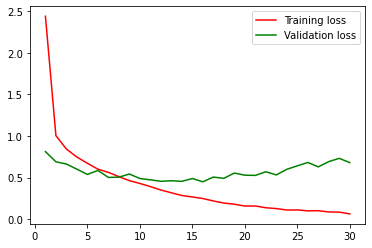

In [24]:
import matplotlib.pyplot as plt

epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

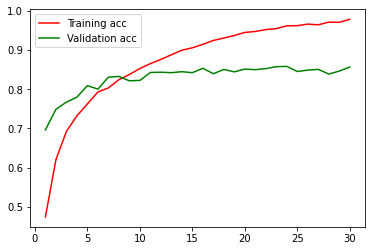

In [25]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.legend()
plt.show()

In [26]:
res = network.evaluate(test_features,test_labels)
print('Accuracy on test set: %.3f'% res[1])

5000/5000 [==============================] - 1s 161us/step
Accuracy on test set: 0.856


# Visualisation of feature maps on Final Model

1
layer 1, no maps 64


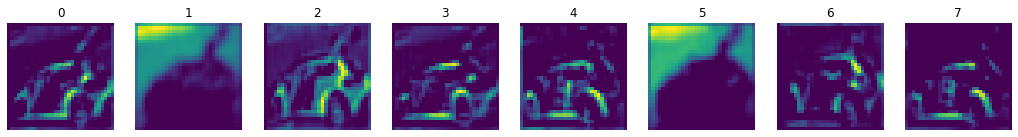

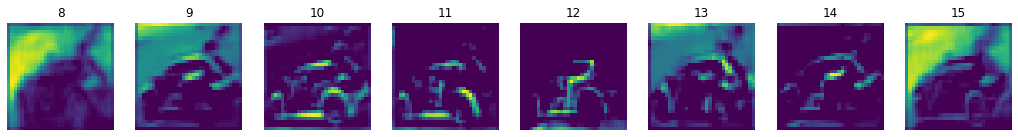

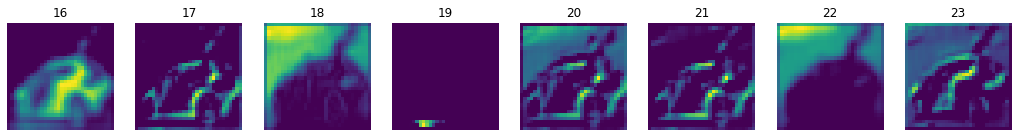

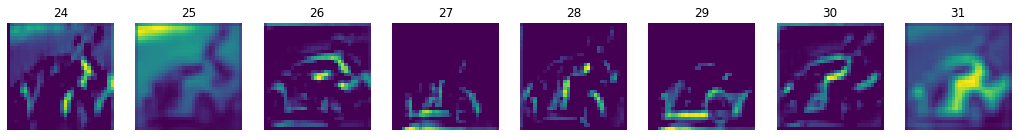

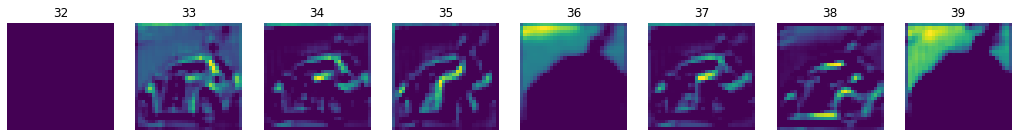

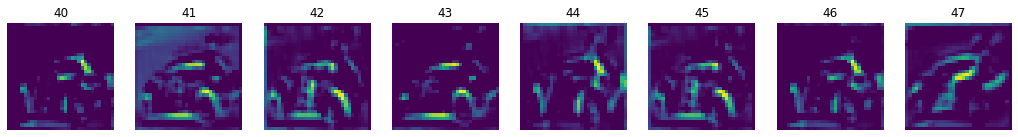

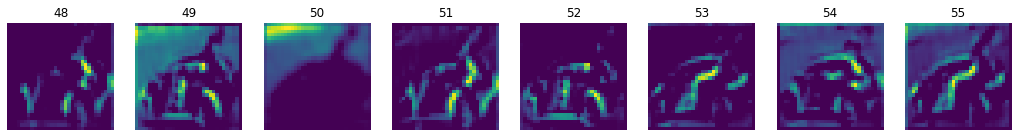

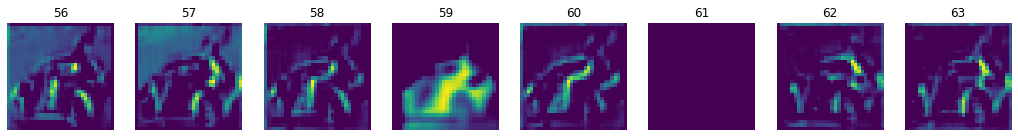

In [139]:
img1_array = image.img_to_array(x_test[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(vgg_base,'block1_conv1')
print(layer_no)
display_feature_maps(vgg_base, img1_array,layer_no,8)

2
layer 2, no maps 64


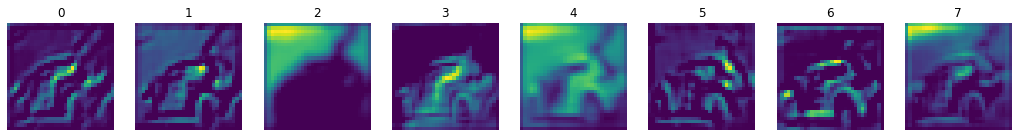

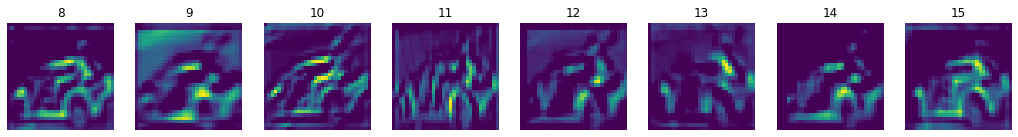

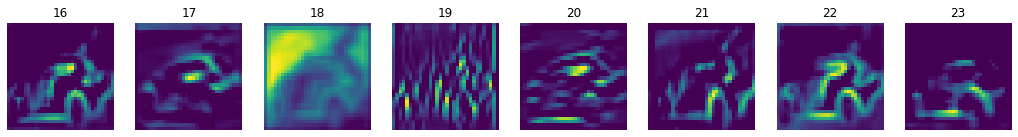

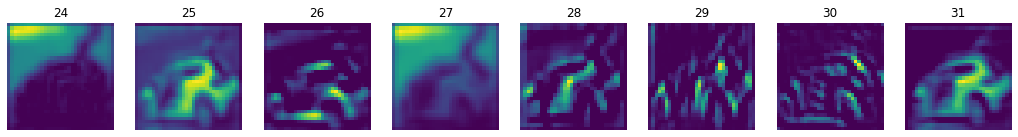

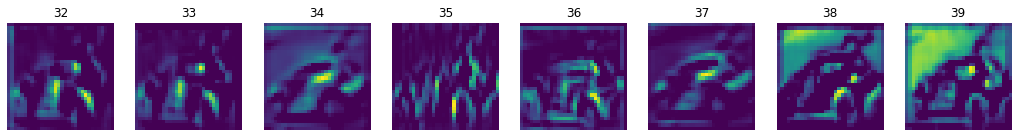

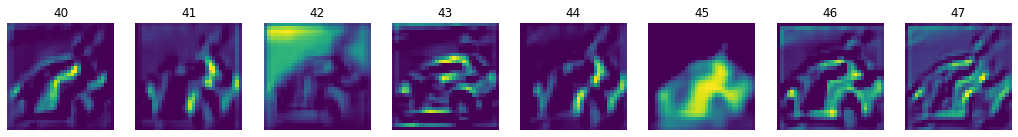

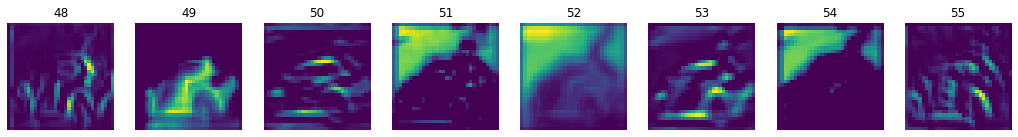

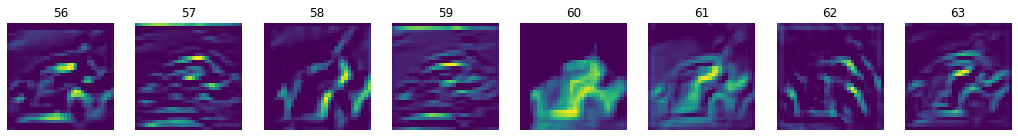

In [119]:
img1_array = image.img_to_array(x_test[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(vgg_base,'block1_conv2')
print(layer_no)
display_feature_maps(vgg_base, img1_array,layer_no,8)

9
layer 9, no maps 256


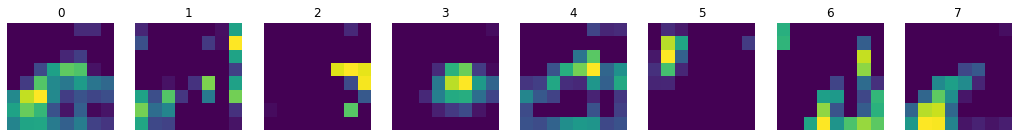

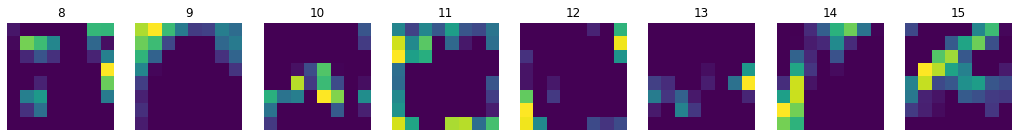

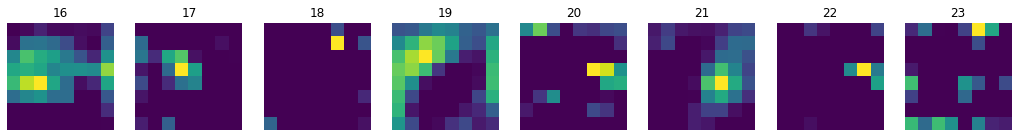

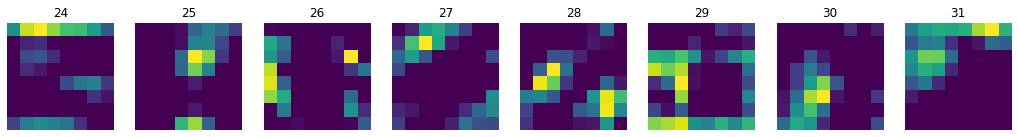

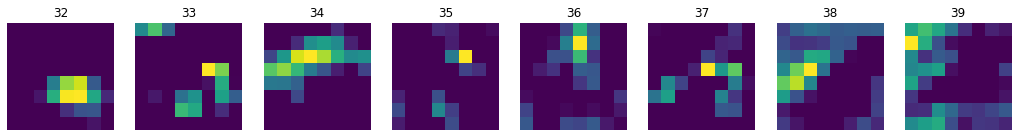

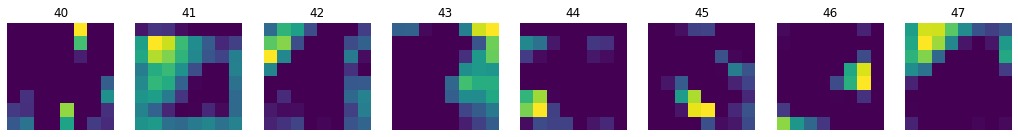

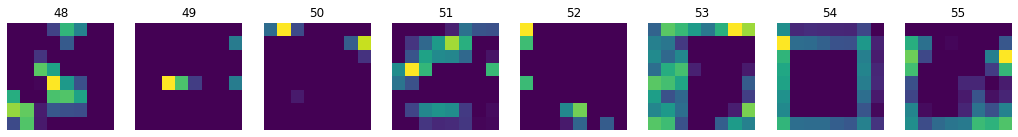

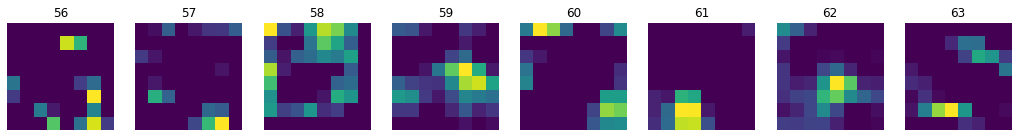

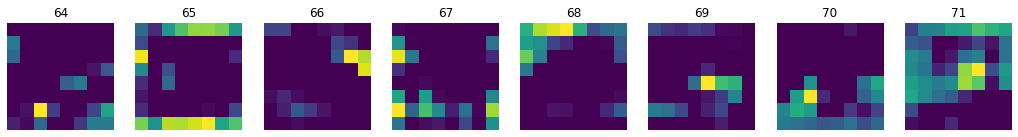

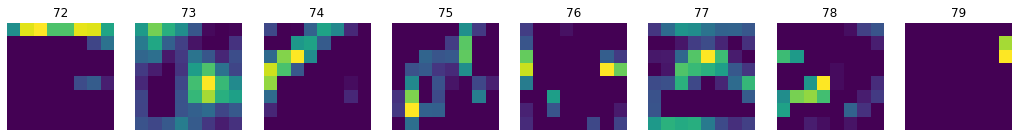

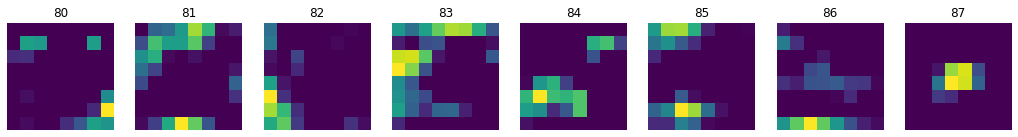

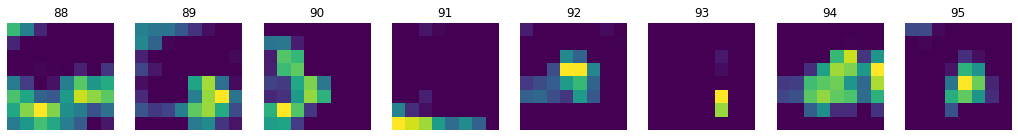

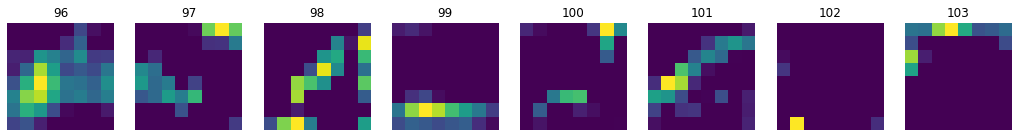

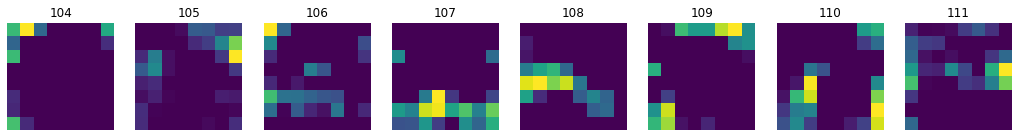

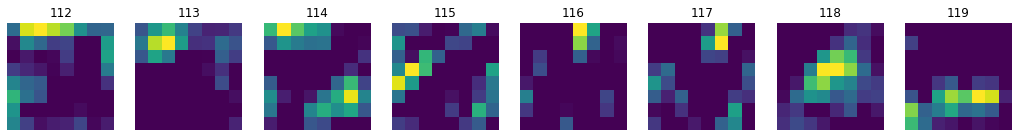

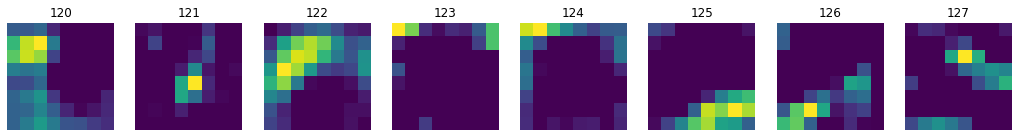

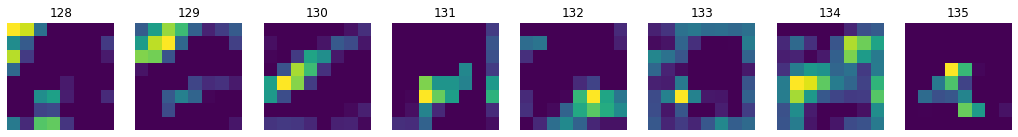

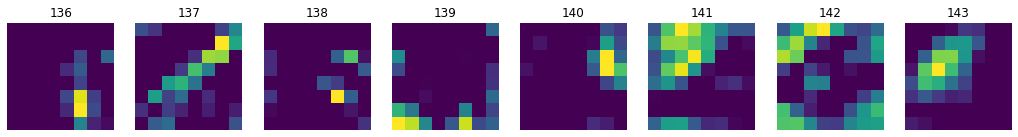

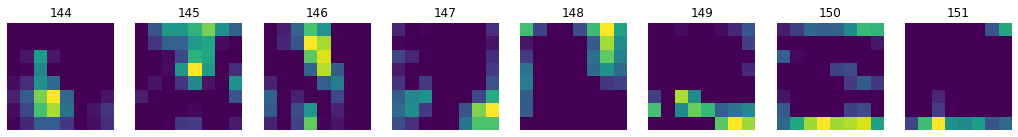

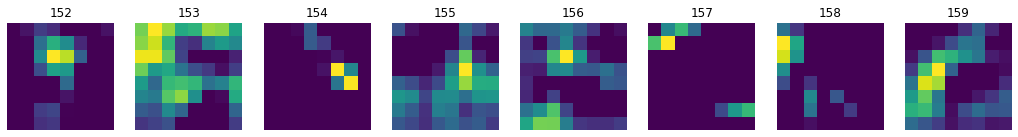

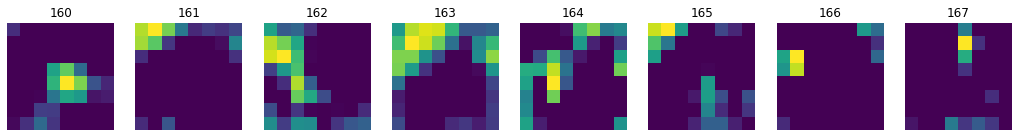

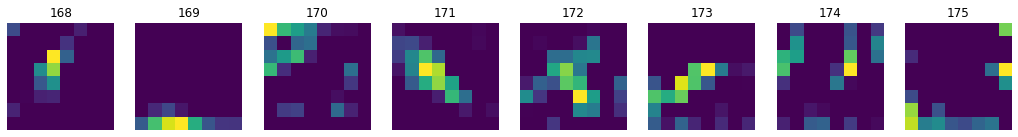

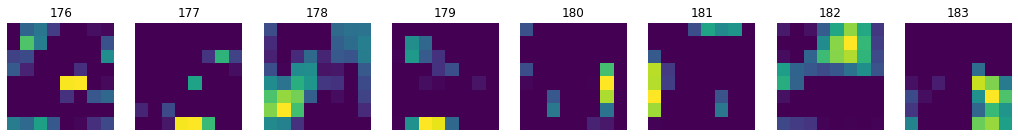

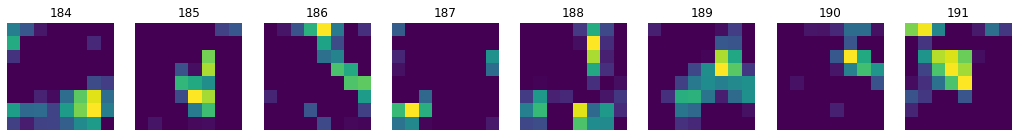

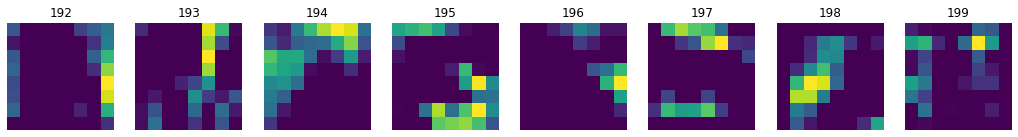

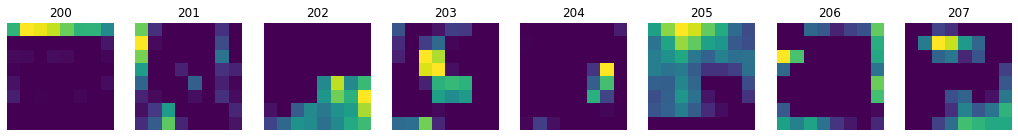

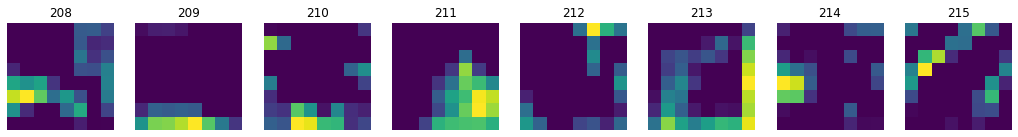

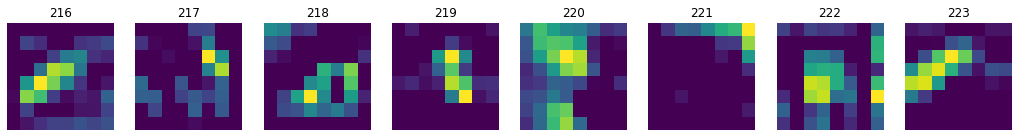

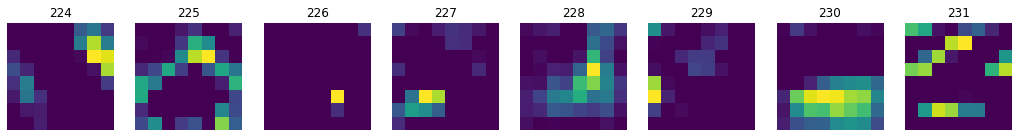

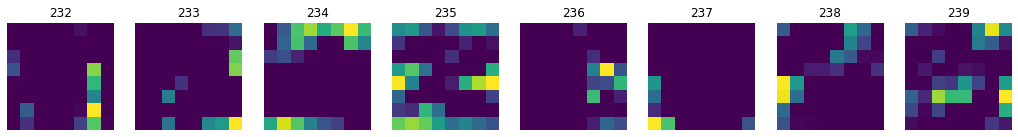

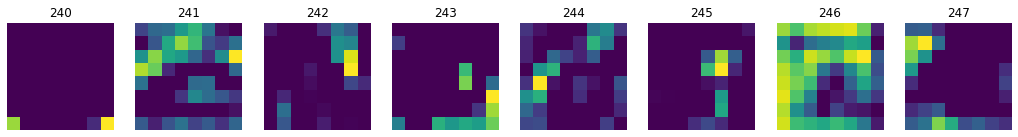

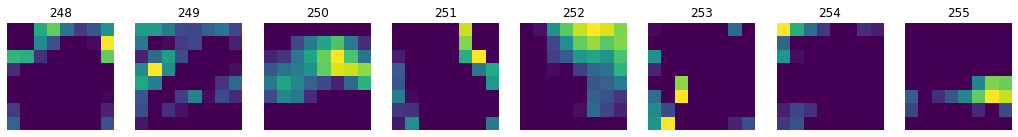

In [142]:
img1_array = image.img_to_array(x_test[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(vgg_base,'block3_conv3')
print(layer_no)
display_feature_maps(vgg_base, img1_array,layer_no,8)

# Feature maps of CNN in classifying network

0
layer 0, no maps 512


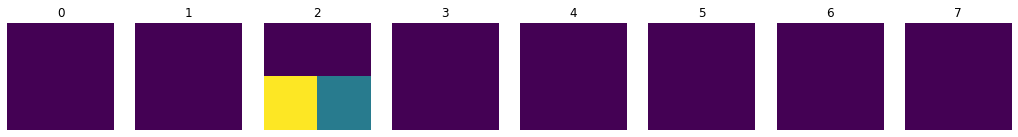

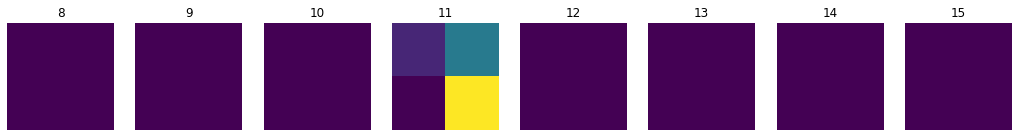

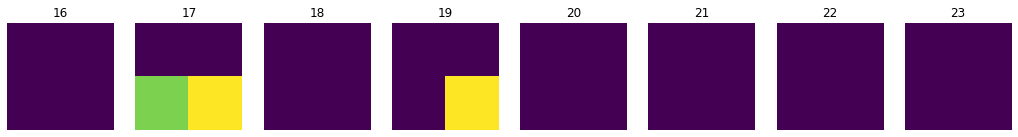

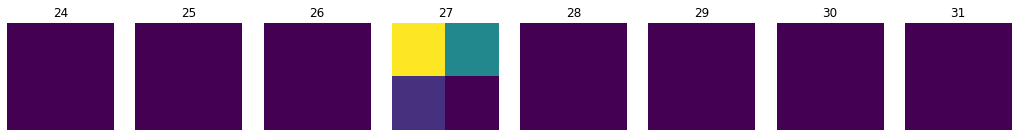

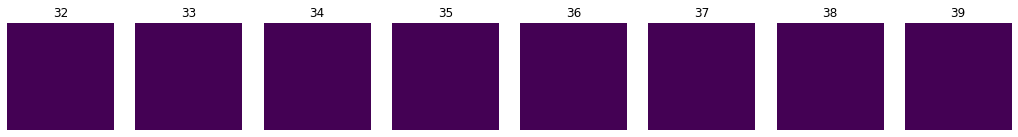

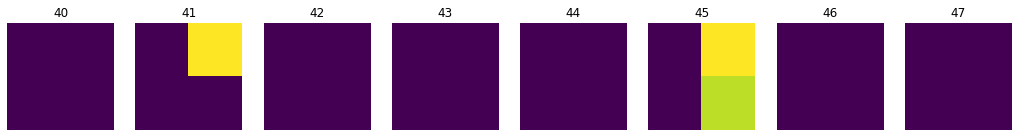

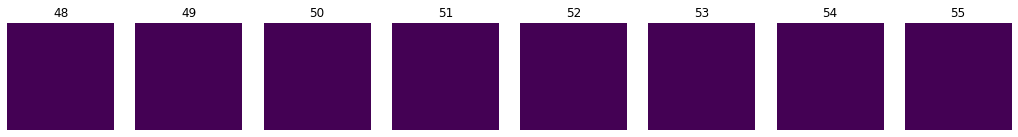

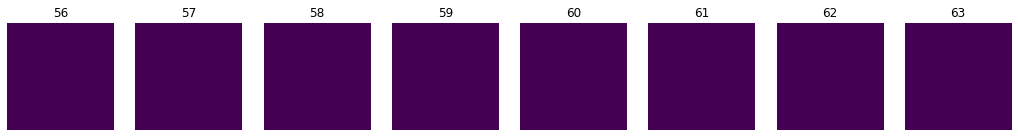

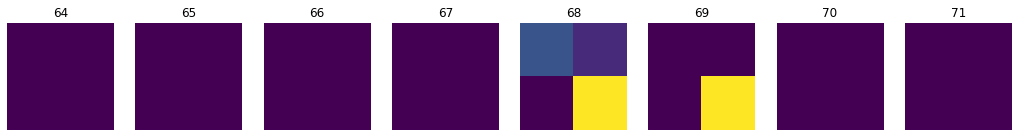

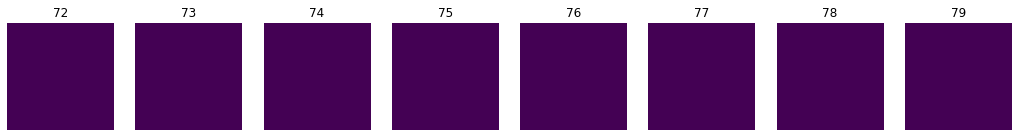

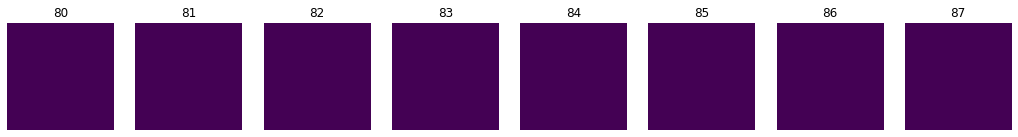

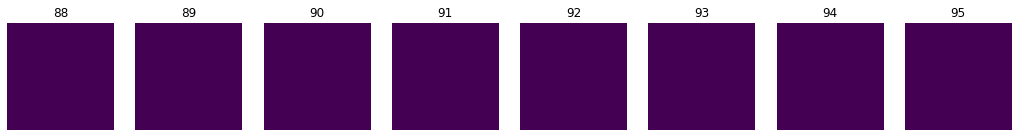

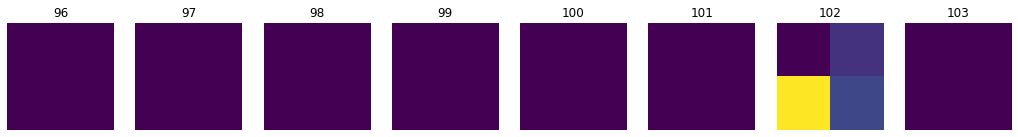

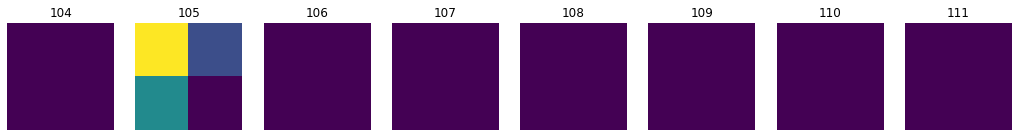

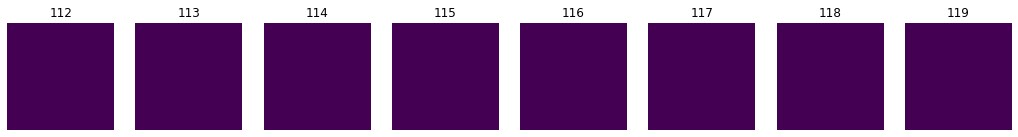

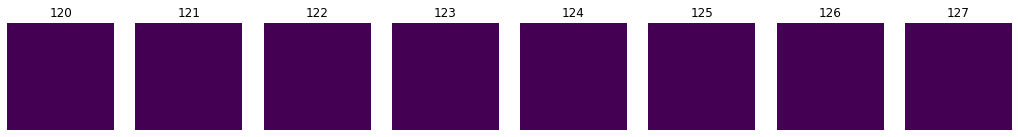

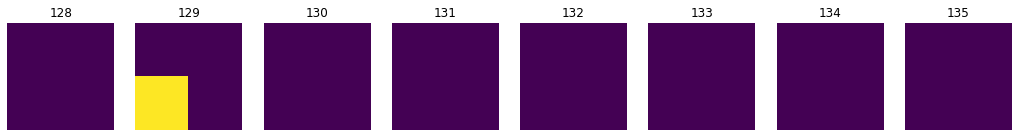

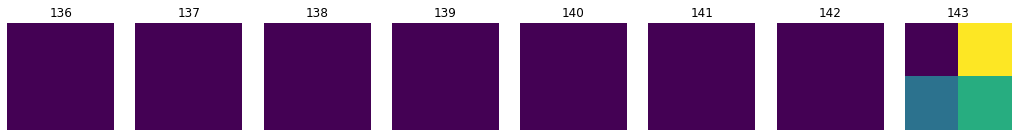

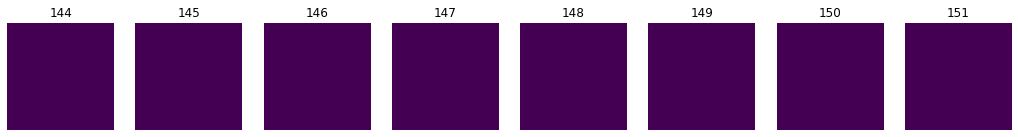

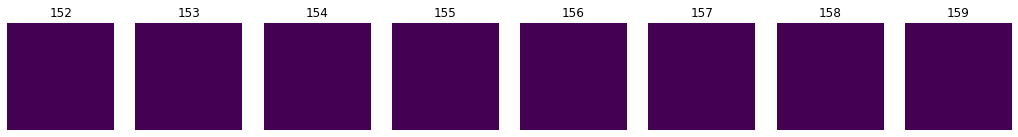

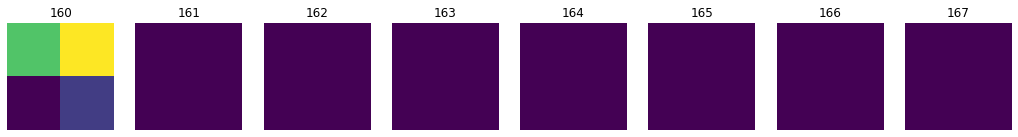

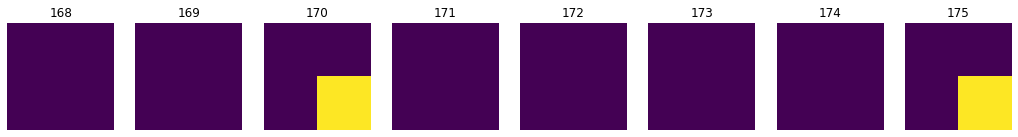

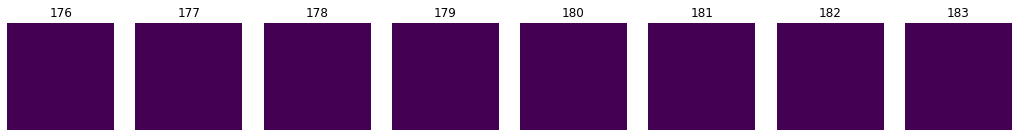

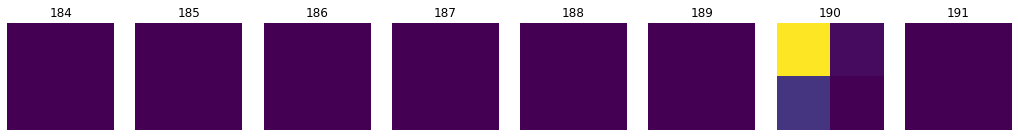

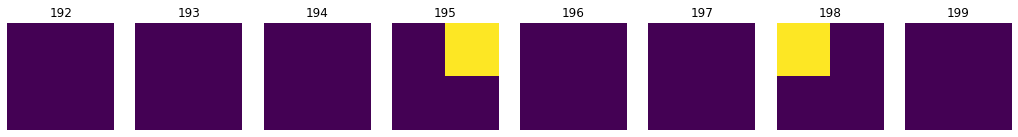

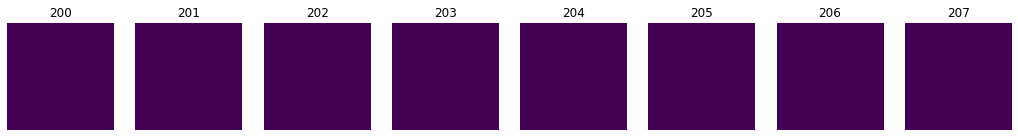

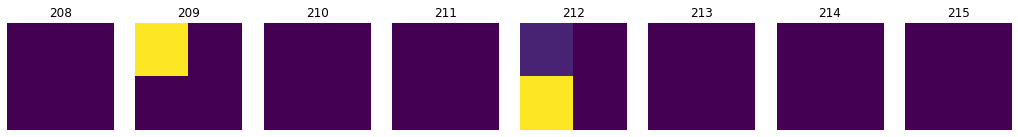

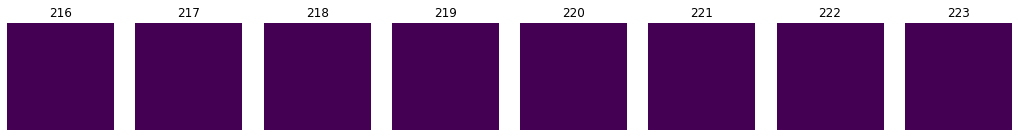

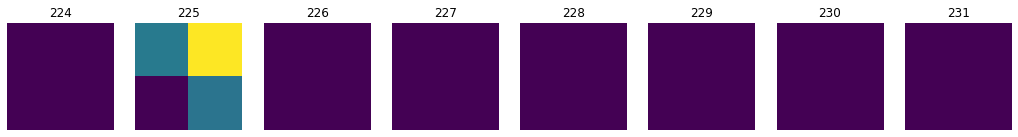

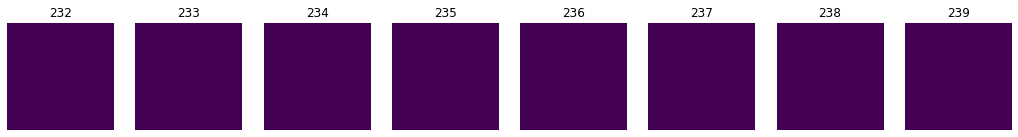

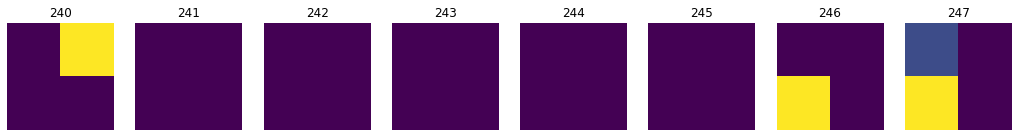

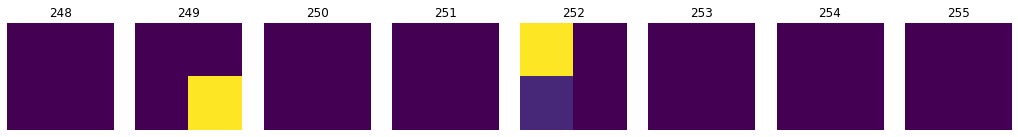

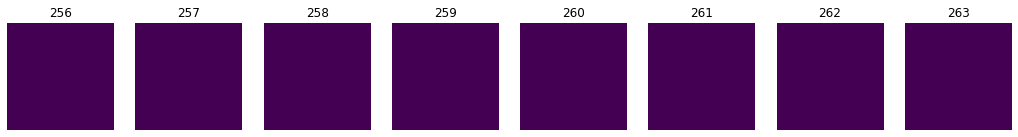

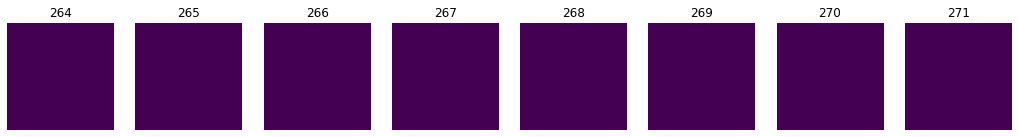

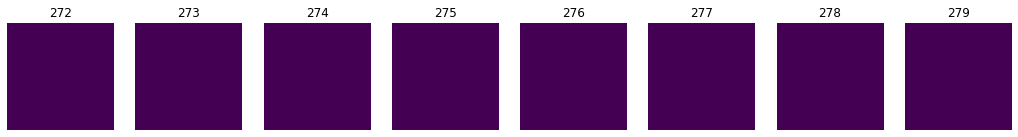

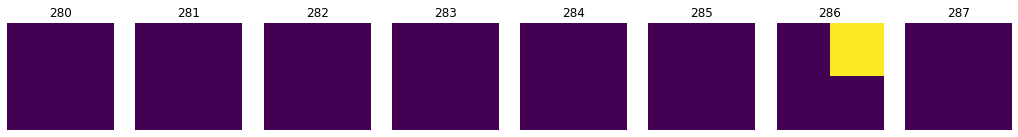

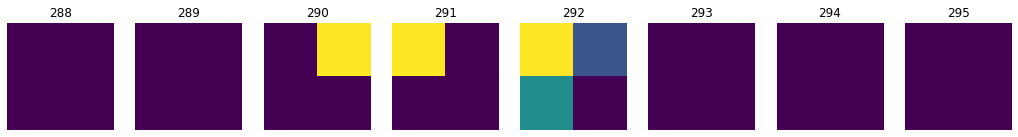

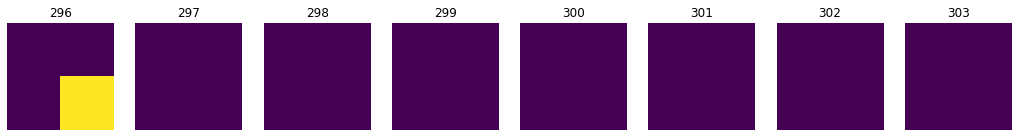

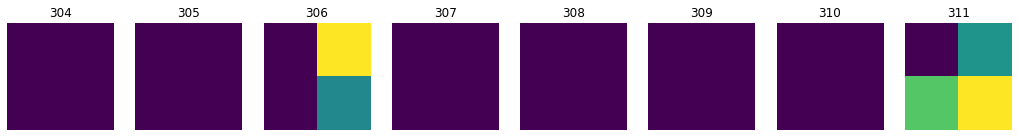

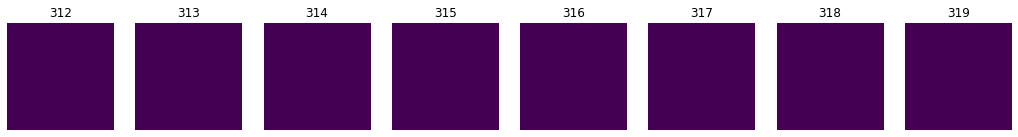

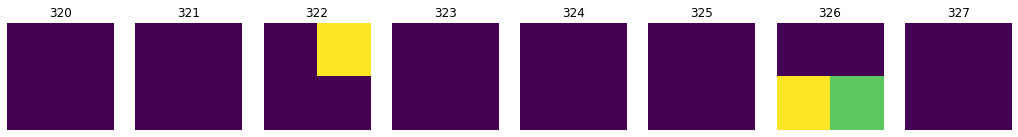

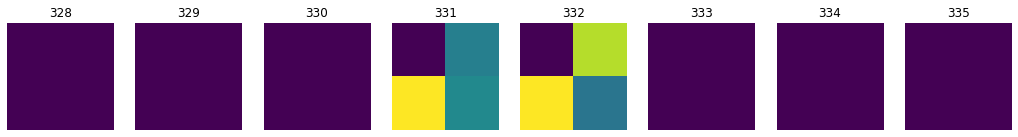

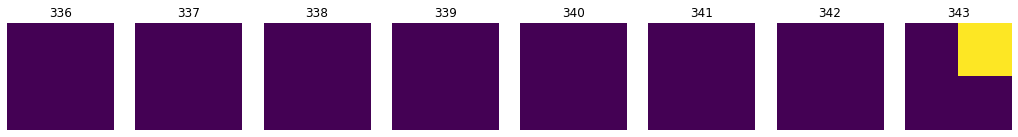

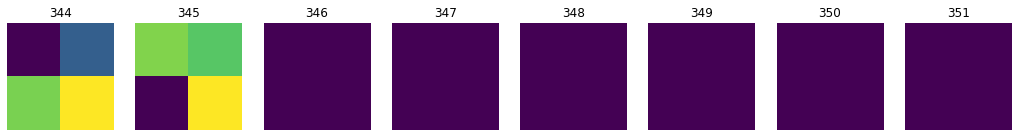

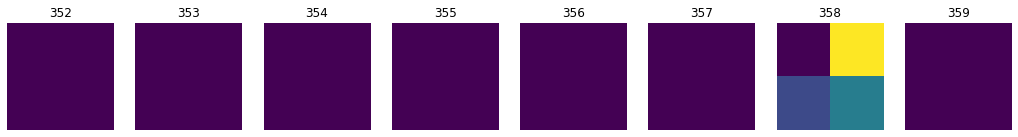

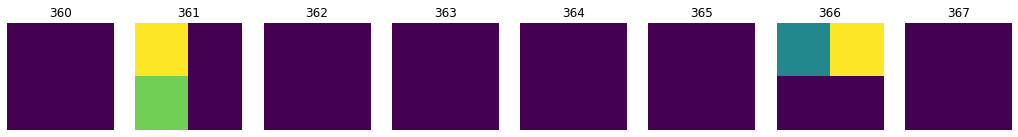

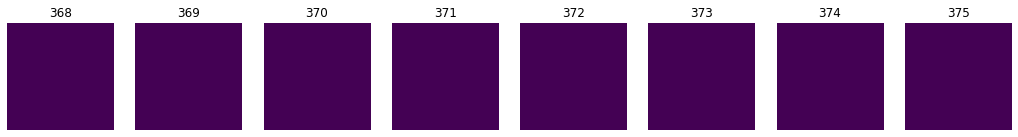

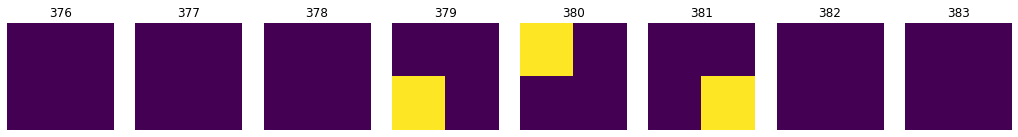

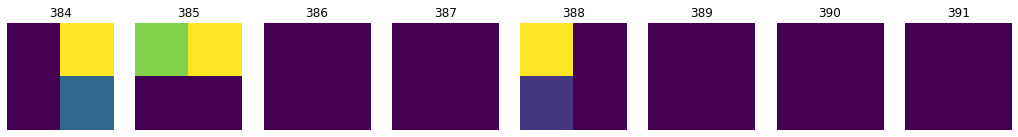

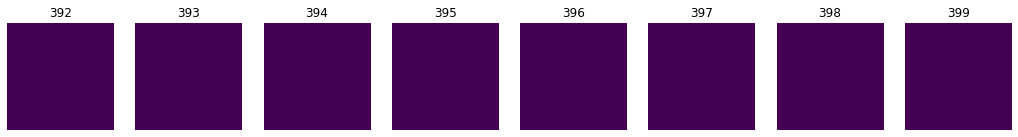

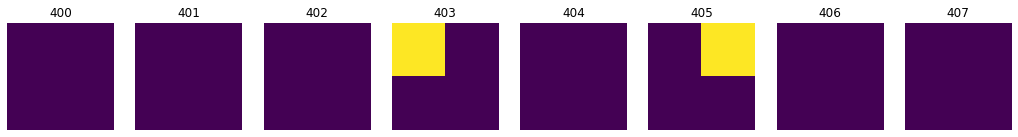

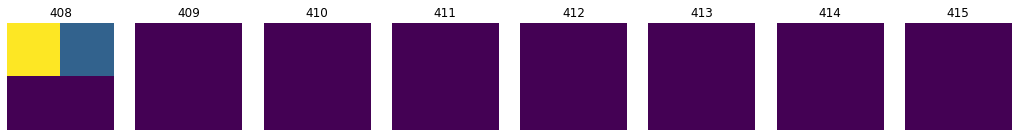

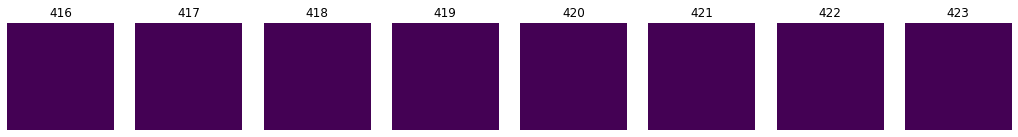

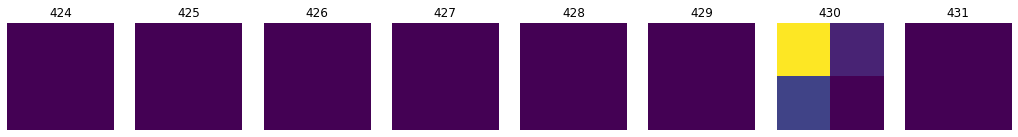

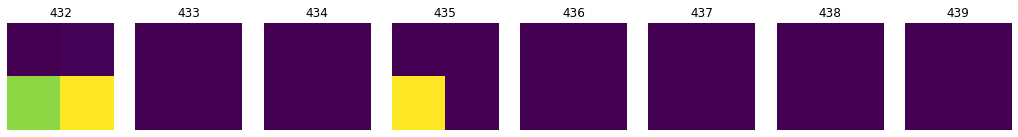

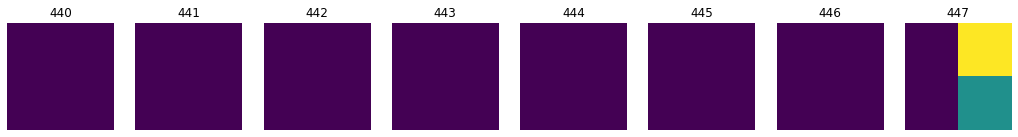

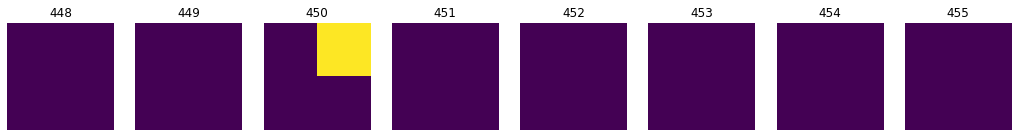

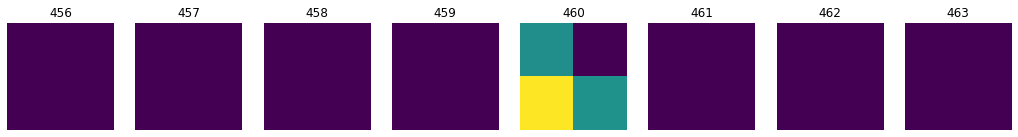

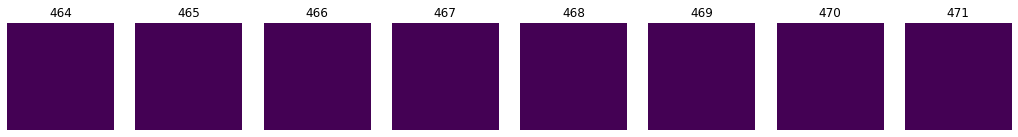

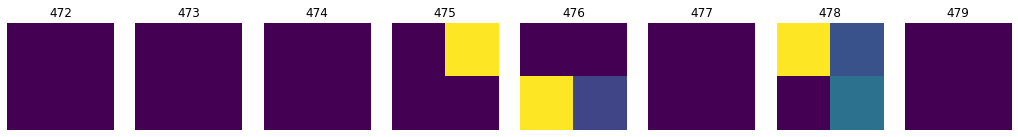

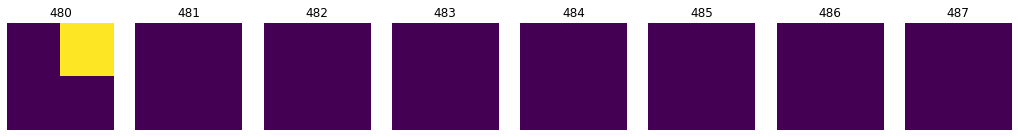

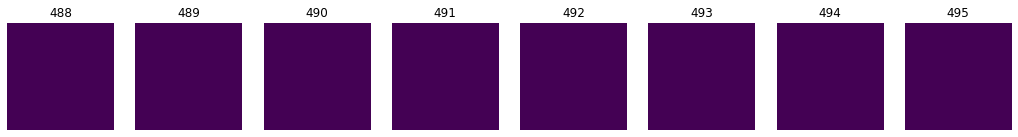

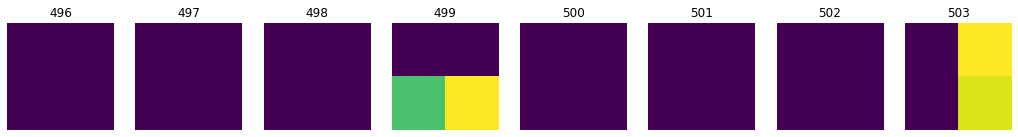

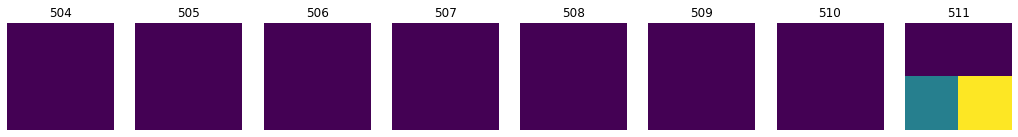

In [118]:
# get feature maps for an image after passing through vgg_base
img1_array = image.img_to_array(test_features[2])
img1_array = np.expand_dims(img1_array, axis=0)

layer_no = get_index(network,'conv2d_3')
print(layer_no)
# get feauture maps of the first layer of the trained layers above the VGG net
display_feature_maps(network, img1_array,layer_no,8)

# Visualization of filters via activation maps

In [137]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras.preprocessing import image
import matplotlib.cm as cm

def visualize_activations(layer_index, no_cols):
    
    #get the no of filters in layer
    
    if "dense" in vgg_base.layers[layer_index].name :
        # if it is a dense layers
        (_,no_filters) =  vgg_base.layers[layer_index].output.shape 
    else:
        # includes dimension of filter
        (_,_,_,no_filters) = vgg_base.layers[layer_index].output.shape 
   
    print('layer index ', layer_index)
    print("No filters",no_filters )
    # obtain the visualizations
    
    vis_list = []
    for i in range(no_filters):
        print(i, end = ' ')
        vis = visualize_activation(vgg_base, layer_index,filter_indices=i)
        vis_list.append(vis)

     #display them in no_cols ann n_rows
    no_rows = no_filters // no_cols

    i = 0
    for row in range(no_rows):
        fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
        for col in range(no_cols):
            axs[col].axis('off')
            axs[col].imshow(vis_list[i])
            axs[col].set_title(str(i))
            i +=1
            
        plt.show()

layer index  1
No filters 64
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

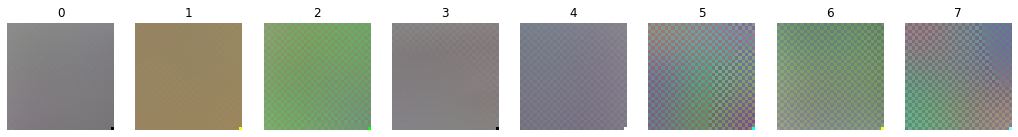

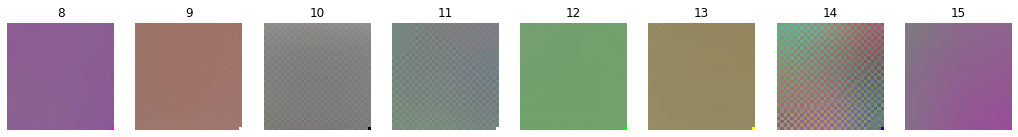

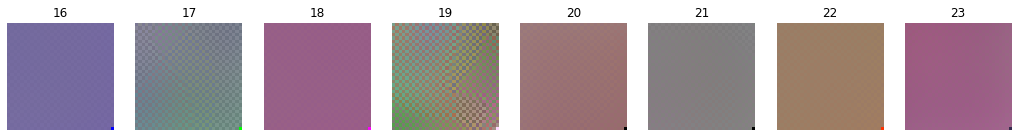

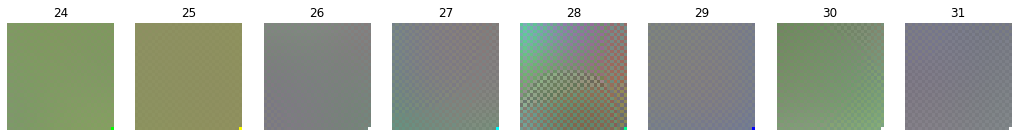

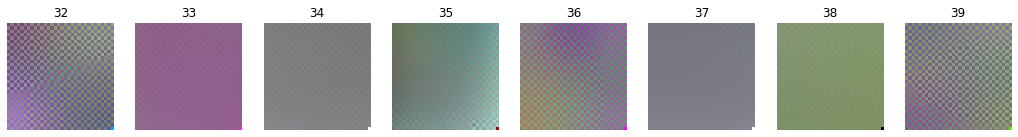

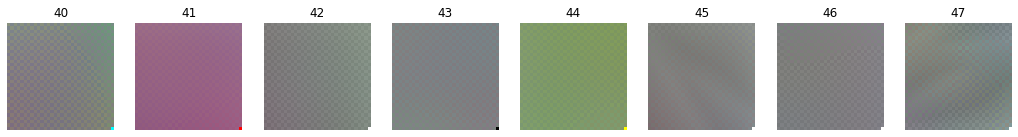

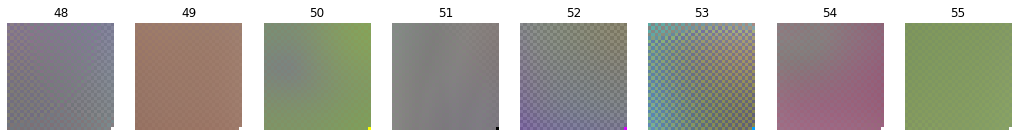

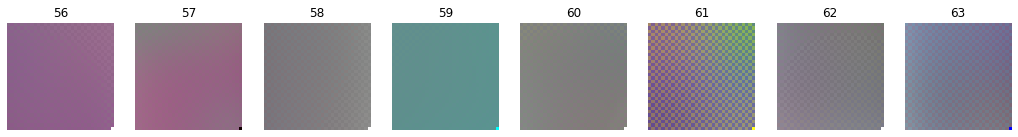

In [134]:
# Visualize the first conv layer

layer_index = utils.find_layer_idx(vgg_base, 'block1_conv1')

visualize_activations(layer_index, 8)

layer index  7
No filters 256
0 1 2 3 4 5 6 7 8 9 

Exception ignored in: <bound method ScopedTFFunction.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFFunction object at 0x000001D8936D4F98>>
Traceback (most recent call last):
  File "C:\Users\mpate\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\c_api_util.py", line 87, in __del__
    def __del__(self):
KeyboardInterrupt


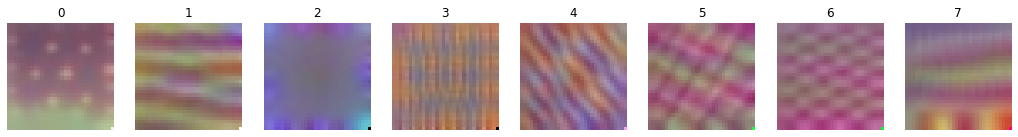

IndexError: list index out of range

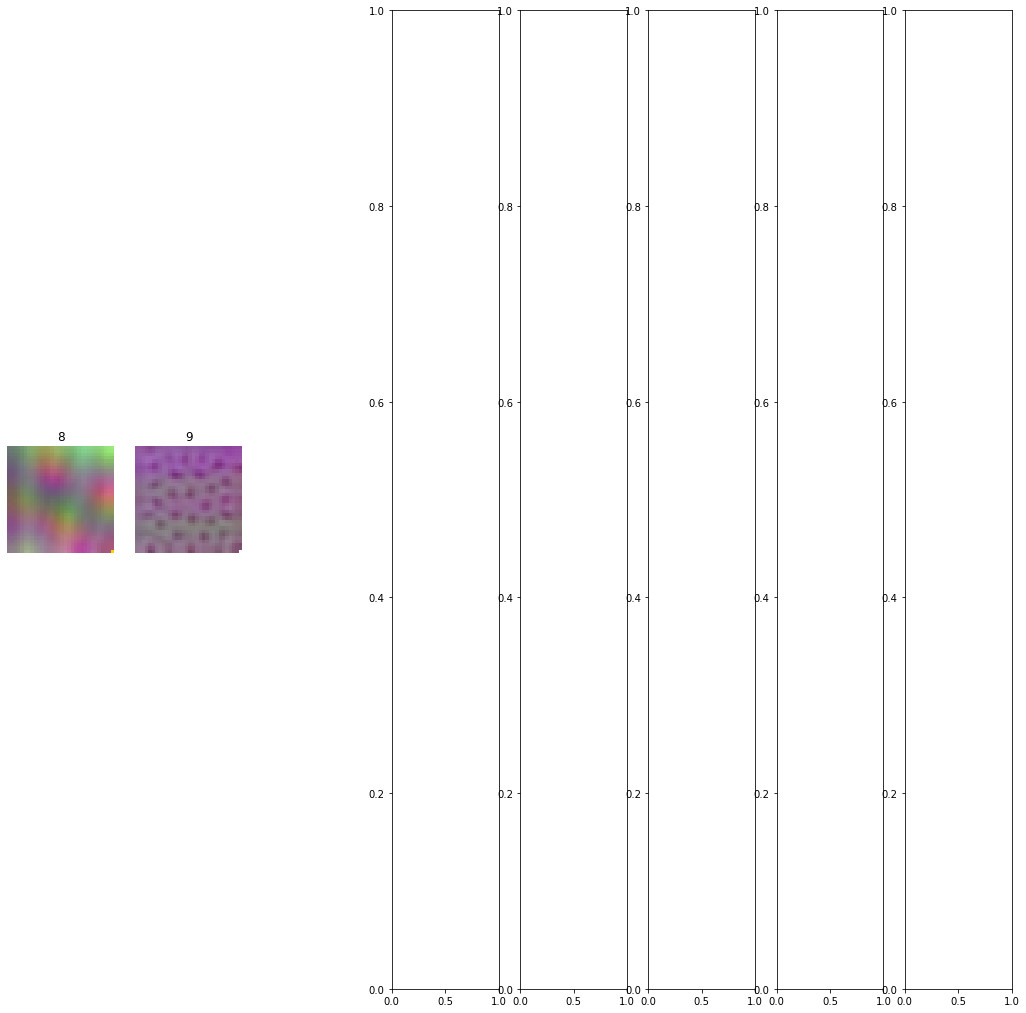

In [155]:
layer_index = utils.find_layer_idx(vgg_base, 'block3_conv1')

visualize_activations(layer_index, 8)

# classification layer

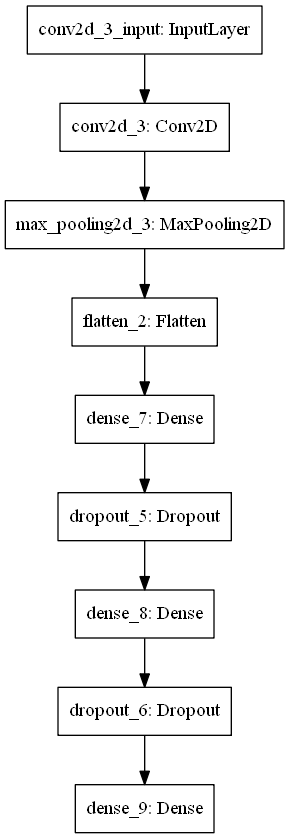

In [144]:
from keras.utils import plot_model
plot_model(network, "train_above_cnn_model.png")

In [ ]:
def create_index_freqs(filename):
    with open(filename) as infile:
        for line in infile:
            #splits line by spacing into an array of words in teh line
            l = line.split()
            for i,s in enumerate(l):
                # example of s: ['avid:1', 'your:1',....]
                wordi,n = s.split(':')
                if not("#" in wordi):
                    # index is a dictionary
                    freq = index.get(wordi,0)
                    # updates the amount of times the word has occured
                    index[wordi]=freq + int(n)      